In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Sample dataset
file_path = "/Users/jiayingyou/Documents/peptides/Results/ic50_MRSA_summary_20240311.xlsx"  # Replace with actual file path
df = pd.read_excel(file_path)
df = df.dropna()

# Extract control peptides
control_peptides = df[df["SampleName"].isin([109, 110, 111])]

# Compute control averages for IC50 values
control_biofilm_avg = control_peptides["IC50 Biofilm"].mean()
control_plank_avg = control_peptides["IC50 Plank"].mean()

# Filter non-control peptides
test_peptides = df[~df["SampleName"].isin([109, 110, 111])]

# Classification based on effectiveness
better_biofilm = ((test_peptides["IC50 Biofilm"] < control_biofilm_avg) & (test_peptides["IC50 Plank"] >= control_plank_avg)).sum()
better_plank = ((test_peptides["IC50 Biofilm"] >= control_biofilm_avg) & (test_peptides["IC50 Plank"] < control_plank_avg)).sum()
both_better = ((test_peptides["IC50 Biofilm"] < control_biofilm_avg) & (test_peptides["IC50 Plank"] < control_plank_avg)).sum()
worse_both = ((test_peptides["IC50 Biofilm"] >= control_biofilm_avg) & (test_peptides["IC50 Plank"] >= control_plank_avg)).sum()

# Waffle plot data
categories = ["Better Biofilm", "Better Plank", "Both Better", "Worse Both"]
counts = [better_biofilm, better_plank, both_better, worse_both]


In [16]:
both_better_mask = (
    (test_peptides["IC50 Biofilm"] < control_biofilm_avg) &
    (test_peptides["IC50 Plank"] < control_plank_avg)
)

# Filter to get peptides in the "Both Better" category
both_better_peptides = test_peptides[both_better_mask]
both_better_peptides

,Unnamed: 0,SampleName,Sequence,Stock_Conc_uM,IC50 Biofilm,IC50 Plank
1,2,2,GRMRWKWIKKRI,372.727273,0.711997,1.025037
6,7,7,RRKGRLYVINKI,449.664429,0.845732,1.405201
9,10,10,WKKKGRMRWKWI,445.454545,0.266122,0.744800
10,11,11,LPALISWIKRKR,394.545455,1.203910,1.357520
13,14,14,KGRKALSRWWVR,455.454545,0.518598,1.349573
19,20,20,LKIKVHIYRMKR,369.127517,0.352943,1.072965
20,21,21,RAPVWITVKTKR,323.636364,1.027042,1.682532
27,28,28,FRVCYRGICYRR,305.369127,0.350066,1.213491
32,33,33,GLKSFARVLKKI,392.760091,1.063587,1.150250
38,39,39,RGFVRLKKWFNI,460.000000,0.231948,1.415249


# mercel

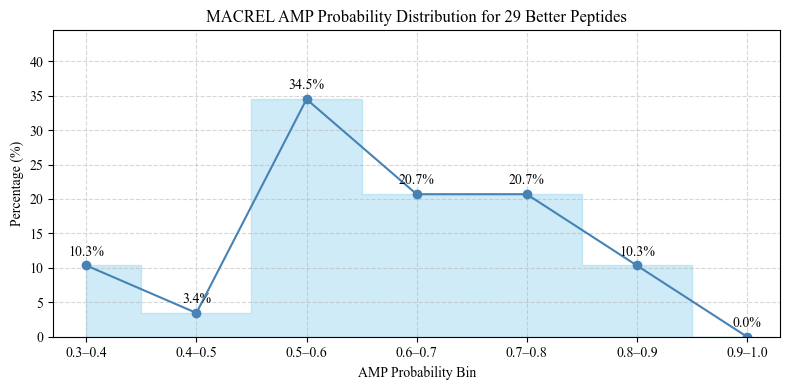

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


macrel_file = "/Users/jiayingyou/Documents/peptides/Benchmarks/macrelout_108.tsv"

df_macrel = pd.read_csv(macrel_file, sep="\t", comment="#")
df_macrel["AMP_probability"] = df_macrel["AMP_probability"].astype(float)

merged = both_better_peptides.merge(df_macrel, how="left", on="Sequence")

# Assume `merged` is already available and includes 'AMP_probability'

# Define new bins and labels
bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ["0.3–0.4", "0.4–0.5", "0.5–0.6", "0.6–0.7", "0.7–0.8", "0.8–0.9", "0.9–1.0"]

# Bin the data
merged["prob_bin"] = pd.cut(merged["AMP_probability"], bins=bins, labels=labels, include_lowest=True)

# Calculate percentages per bin
bin_counts = merged["prob_bin"].value_counts().sort_index()
bin_percentages = 100 * bin_counts / bin_counts.sum()

# Plot area plot
plt.figure(figsize=(8, 4))
plt.fill_between(bin_percentages.index.astype(str), bin_percentages.values, step="mid", alpha=0.4, color="skyblue")
plt.plot(bin_percentages.index.astype(str), bin_percentages.values, marker="o", linestyle="-", color="steelblue")

# Annotate each point
for x, y in zip(bin_percentages.index.astype(str), bin_percentages.values):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center', va='bottom')

plt.title("MACREL AMP Probability Distribution for 29 Better Peptides")
plt.xlabel("AMP Probability Bin")
plt.ylabel("Percentage (%)")
plt.ylim(0, max(bin_percentages.values) + 10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# AI4AMP

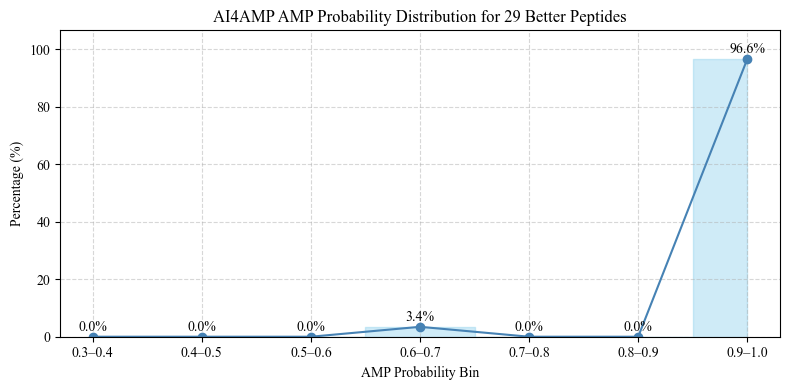

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ai4amp_file = "/Users/jiayingyou/Documents/peptides/Benchmarks/ai4amp.csv"

df_new = pd.read_csv(ai4amp_file)
df_new["AMP_probability"] = df_new["Probability"].astype(float)
df_new
merged = both_better_peptides.merge(df_new, how="left", on="Sequence")

# Assume `merged` is already available and includes 'AMP_probability'

# Define new bins and labels
bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ["0.3–0.4", "0.4–0.5", "0.5–0.6", "0.6–0.7", "0.7–0.8", "0.8–0.9", "0.9–1.0"]

# Bin the data
merged["prob_bin"] = pd.cut(merged["AMP_probability"], bins=bins, labels=labels, include_lowest=True)

# Calculate percentages per bin
bin_counts = merged["prob_bin"].value_counts().sort_index()
bin_percentages = 100 * bin_counts / bin_counts.sum()

# Plot area plot
plt.figure(figsize=(8, 4))
plt.fill_between(bin_percentages.index.astype(str), bin_percentages.values, step="mid", alpha=0.4, color="skyblue")
plt.plot(bin_percentages.index.astype(str), bin_percentages.values, marker="o", linestyle="-", color="steelblue")

# Annotate each point
for x, y in zip(bin_percentages.index.astype(str), bin_percentages.values):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center', va='bottom')

plt.title("AI4AMP AMP Probability Distribution for 29 Better Peptides")
plt.xlabel("AMP Probability Bin")
plt.ylabel("Percentage (%)")
plt.ylim(0, max(bin_percentages.values) + 10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [111]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

avg_df = df.groupby("Sequence", as_index=False).mean()
ic50_df = avg_df[['Sequence','IC50 Biofilm','IC50 Plank']]

merged = pd.merge(ic50_df, df_new, on="Sequence", how="inner")
reference_AMP_probability = merged[merged["Sequence"].str.contains("VRLIVAVRIWRR")]["AMP_probability"].values[0]
merged["AI4AMP label"] = (merged["AMP_probability"] > reference_AMP_probability).astype(int)
reference_AMP_Biofilm = merged[merged["Sequence"].str.contains("VRLIVAVRIWRR")]["IC50 Biofilm"].values[0]
merged["Biofilm label"] = (merged["IC50 Biofilm"] < reference_AMP_Biofilm).astype(int)
reference_AMP_Plank = merged[merged["Sequence"].str.contains("VRLIVAVRIWRR")]["IC50 Plank"].values[0]
merged["Plank label"] = (merged["IC50 Plank"] < reference_AMP_Plank).astype(int)


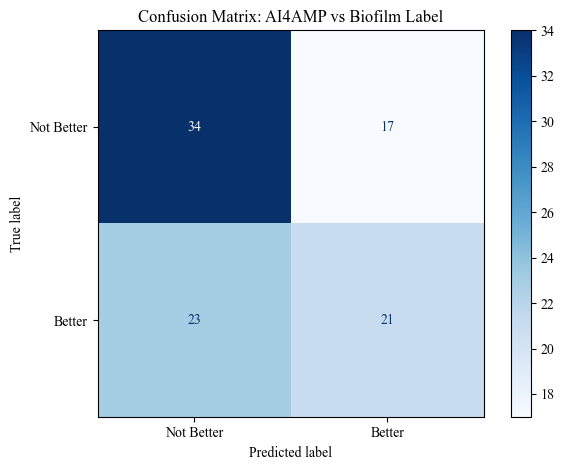

Accuracy: 0.5789473684210527
Precision: 0.5526315789473685
Recall: 0.4772727272727273
F1 Score: 0.5121951219512196


In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Extract true and predicted labels
y_true = merged["Biofilm label"]
y_pred = merged["AI4AMP label"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Better", "Better"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: AI4AMP vs Biofilm Label")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

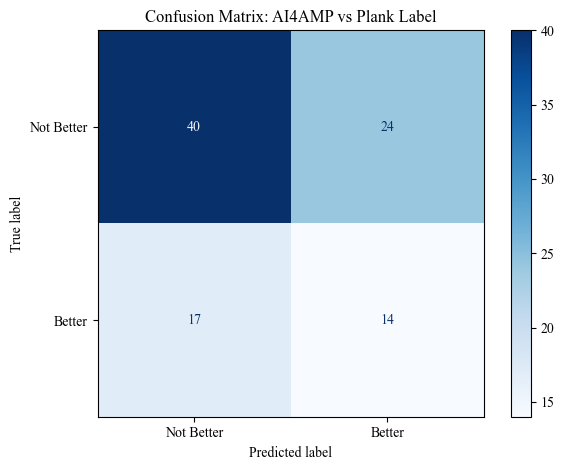

Accuracy: 0.5684210526315789
Precision: 0.3684210526315789
Recall: 0.45161290322580644
F1 Score: 0.40579710144927533


In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Extract true and predicted labels
y_true = merged["Plank label"]
y_pred = merged["AI4AMP label"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Better", "Better"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: AI4AMP vs Plank Label")
plt.grid(False)
plt.tight_layout()
plt.show()

# Print metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

# DBAASP (https://dbaasp.org/tools?page=linear-amp-prediction)

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dbaasp_file = "/Users/jiayingyou/Documents/peptides/Benchmarks/dbaasp_res.csv"

df_dbaasp = pd.read_csv(dbaasp_file)

merged_dbaasp = both_better_peptides.merge(df_dbaasp, how="inner", on="Sequence")
mapping = {"AMP":1,"Non-AMP":0}

merged_dbaasp['Label'] = merged_dbaasp['Class'].map(mapping)

merged_dbaasp['True_Label'] = [1]*merged_dbaasp.shape[0]
merged_dbaasp

,Unnamed: 0,SampleName,Sequence,Stock_Conc_uM,IC50 Biofilm,IC50 Plank,Seq. ID,Class,Label,True_Label
0,2,2,GRMRWKWIKKRI,372.727273,0.711997,1.025037,MySeq_002|AMP,AMP,1,1
1,7,7,RRKGRLYVINKI,449.664429,0.845732,1.405201,MySeq_007|AMP,Non-AMP,0,1
2,10,10,WKKKGRMRWKWI,445.454545,0.266122,0.744800,MySeq_010|AMP,AMP,1,1
3,11,11,LPALISWIKRKR,394.545455,1.203910,1.357520,MySeq_011|AMP,Non-AMP,0,1
4,14,14,KGRKALSRWWVR,455.454545,0.518598,1.349573,MySeq_014|AMP,AMP,1,1
5,20,20,LKIKVHIYRMKR,369.127517,0.352943,1.072965,MySeq_020|AMP,Non-AMP,0,1
6,21,21,RAPVWITVKTKR,323.636364,1.027042,1.682532,MySeq_021|AMP,Non-AMP,0,1
7,28,28,FRVCYRGICYRR,305.369127,0.350066,1.213491,MySeq_028|AMP,Non-AMP,0,1
8,33,33,GLKSFARVLKKI,392.760091,1.063587,1.150250,MySeq_033|AMP,AMP,1,1
9,39,39,RGFVRLKKWFNI,460.000000,0.231948,1.415249,MySeq_039|AMP,AMP,1,1


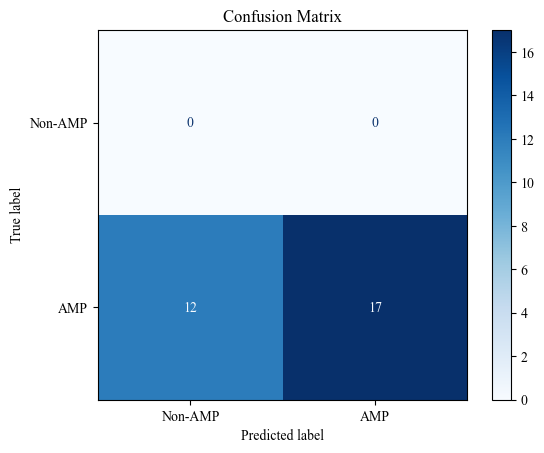

              precision    recall  f1-score   support

     Non-AMP       0.00      0.00      0.00         0
         AMP       1.00      0.59      0.74        29

    accuracy                           0.59        29
   macro avg       0.50      0.29      0.37        29
weighted avg       1.00      0.59      0.74        29



/Users/jiayingyou/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiayingyou/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiayingyou/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(merged_dbaasp["True_Label"], merged_dbaasp["Label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-AMP", "AMP"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report

print(classification_report(merged_dbaasp["True_Label"], merged_dbaasp["Label"], target_names=["Non-AMP", "AMP"]))


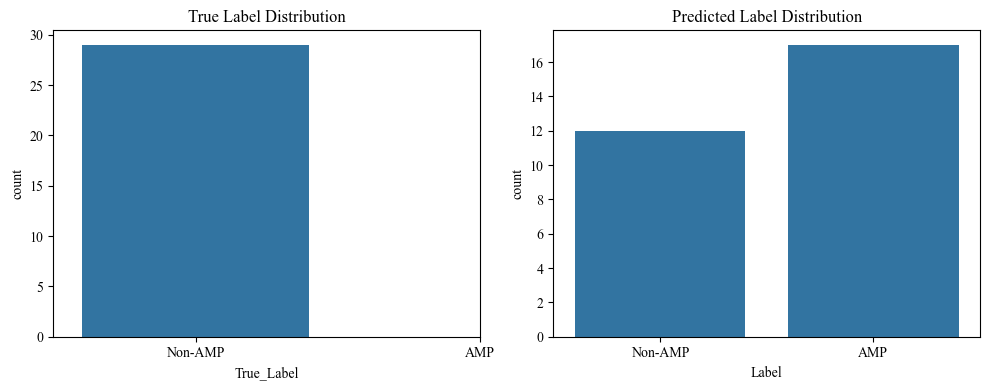

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=merged_dbaasp["True_Label"])
plt.title("True Label Distribution")
plt.xticks([0, 1], ["Non-AMP", "AMP"])

plt.subplot(1, 2, 2)
sns.countplot(x=merged_dbaasp["Label"])
plt.title("Predicted Label Distribution")
plt.xticks([0, 1], ["Non-AMP", "AMP"])

plt.tight_layout()
plt.show()


In [141]:
pwd

'/Users/jiayingyou'